In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
print(torch.cuda.is_available())


True


In [2]:
# create known paramters
# creating data
weight = 0.7
bias = 0.3

# data
start = 0
end = 1
step = 0.02
# x is capital because it's a matrix or tensor
X = torch.arange(start, end, step).unsqueeze(dim=1)  # adds an extra dimension
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
# Create a train/test split
# 80 percent for the train split
train_split = int(0.8 * len(X))
# first 40 examples for the training examples
X_train, y_train = X[:train_split], y[:train_split]
# last 10 examples for the testing examples
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [4]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):
    """
    plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data ")

    # plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions ?
    if predictions is not None:
        # plot the predictions
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # show the legend
    plt.legend(prop={"size": 14})

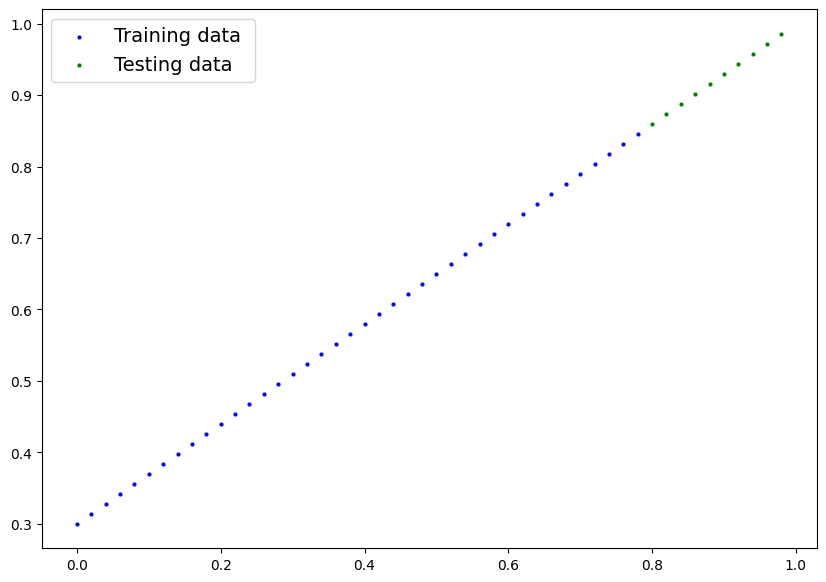

In [5]:
plot_predictions()

In [6]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # requires_grad=True tells PyTorch to calculate gradients for this parameter
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        
    # forward method is used to calculate the output of the model in this case is linear regression
    # x is the input
    def forward(self,x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias
    
    
    

### Pytorch model building 

In [ ]:
# create a random seed 
torch.manual_seed(42)

# model instance
model_0 = LinearRegression()

# returning the parameters of the model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameters
model_0.state_dict()

# we are trying to get close to the actual values of the weight and bias

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

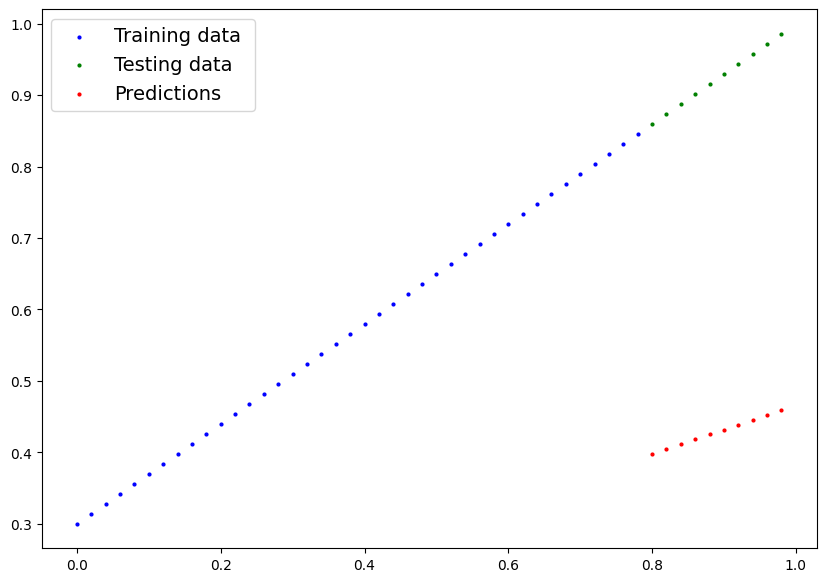

In [ ]:
# making preictions with torch.inferance_mode to check how well the model is doing
# we are not training the model
# turns off the gradient tracking
# we are just making predictions
# we are not updating the weights and biases
# we are not calculating the gradients
with torch.inference_mode():
    predictions = model_0(X_test)
    plot_predictions(predictions=predictions)

predictions